In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.utils as mafUtils
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

# Import the contributed metrics, to get GalaxyCountsMetric
from mafContrib import GalaxyCountsMetric_extended

In [2]:
db_files = ['baseline10yrs.db', 'gp_heavy10yrs.db', 'big_sky10yrs.db', 'big_sky_nouiy10yrs.db']

In [3]:
nside = 64

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter="i" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:916: DeprecationWarning: Sed.setupCCMab is now deprecated in favor of Sed.setupCCM_ab
  DeprecationWarning)


Found 554977 visits
Running:  [1]


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/maps/dustMap.py:25: UserWarning: Slicer value of nside (64) different from map value (128), using slicer value
  % (slicePoints['nside'],self.nside ))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.
monopole: 411129  dipole: lon: 34.3377, lat: -57.0641, amp: 101763
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter="i" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:916: DeprecationWarning: Sed.setupCCMab is now deprecated in favor of Sed.setupCCM_ab
  DeprecationWarning)


Found 556395 visits
Running:  [1]


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/maps/dustMap.py:25: UserWarning: Slicer value of nside (64) different from map value (128), using slicer value
  % (slicePoints['nside'],self.nside ))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.
monopole: 407619  dipole: lon: 24.018, lat: -58.1897, amp: 103099
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter="i" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:916: DeprecationWarning: Sed.setupCCMab is now deprecated in favor of Sed.setupCCM_ab
  DeprecationWarning)


Found 551268 visits
Running:  [1]


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/maps/dustMap.py:25: UserWarning: Slicer value of nside (64) different from map value (128), using slicer value
  % (slicePoints['nside'],self.nside ))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.
monopole: 397836  dipole: lon: 27.5245, lat: -61.2452, amp: 124388
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter="i" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:916: DeprecationWarning: Sed.setupCCMab is now deprecated in favor of Sed.setupCCM_ab
  DeprecationWarning)


Found 503623 visits
Running:  [1]


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/maps/dustMap.py:25: UserWarning: Slicer value of nside (64) different from map value (128), using slicer value
  % (slicePoints['nside'],self.nside ))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 254 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 511908  dipole: lon: 38.6387, lat: -62.8302, amp: 95003.9
Plotting complete.


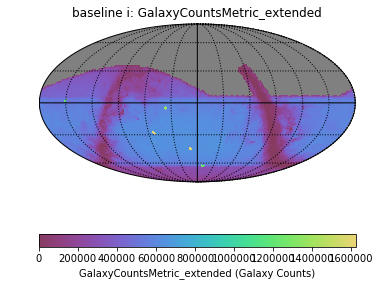

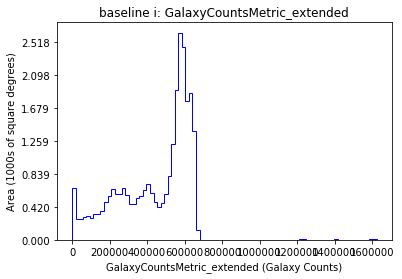

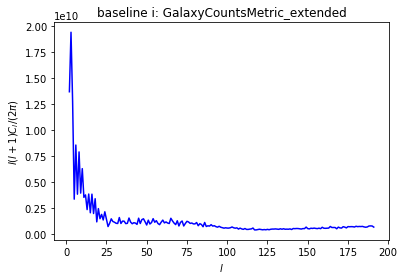

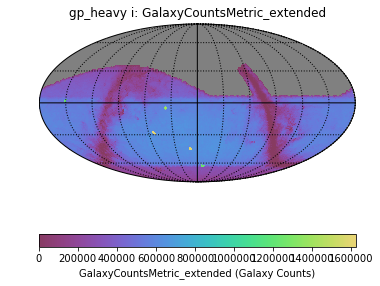

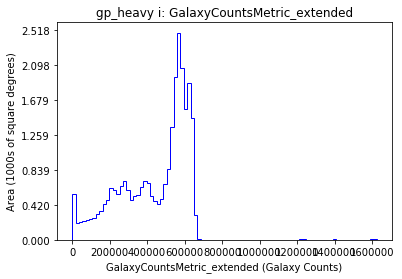

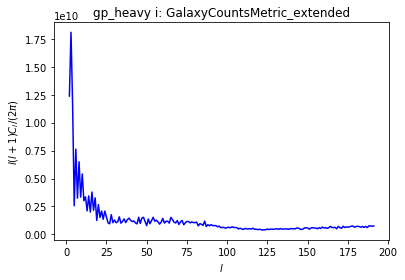

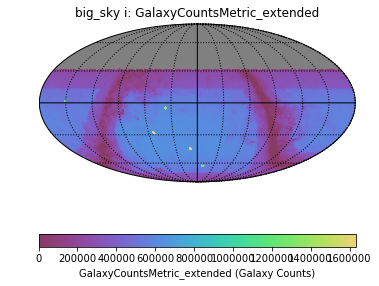

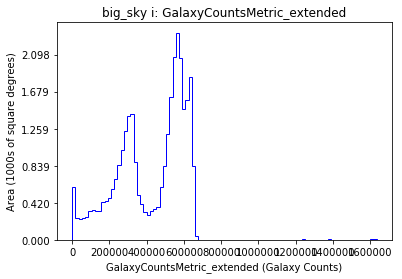

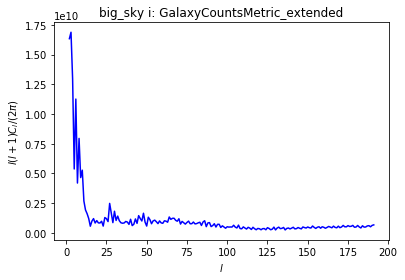

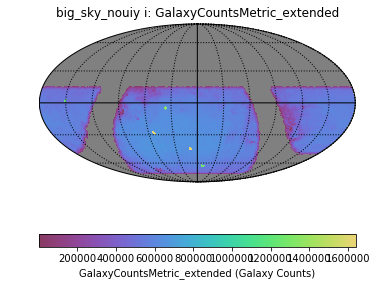

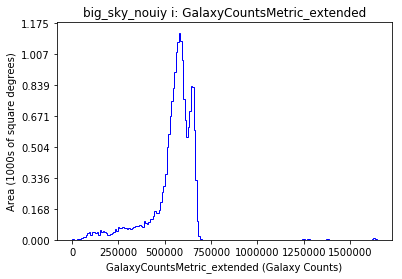

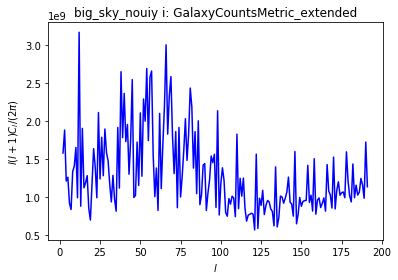

In [4]:
area_mins = []
area_sums = []
area_limit = 1600
for filename in db_files:
    opsdb = db.OpsimDatabase(filename)
    filtername = 'i'
    sql='filter="%s"' % filtername
    slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
    metric = GalaxyCountsMetric_extended(nside=nside, filterBand=filtername)
    ss = [metrics.AreaSummaryMetric(reduce_func=np.sum, area=area_limit, metricName='AreaSum') ]
    ss.append(metrics.AreaSummaryMetric(reduce_func=np.min, area=area_limit, metricName='AreaMin'))
    bundle = metricBundles.MetricBundle(metric, slicer, sql,
                                        summaryMetrics=ss, runName=filename[:-8])
    bundles = {1: bundle}
    outDir = 'galaxyCounts'
    resultsDb = db.ResultsDb(outDir=outDir)
    mb = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir, resultsDb=resultsDb)
    mb.runAll()
    mb.plotAll(closefigs=False)
    
    area_mins.append(bundles[1].summaryValues['AreaMin'])
    area_sums.append(bundles[1].summaryValues['AreaSum'])
    

In [5]:
for i,name in enumerate(db_files):
    print(name, '  ', area_sums[i]/1e9, area_mins[i]/1e4)

baseline10yrs.db    1.28207747812 64.1580036202
gp_heavy10yrs.db    1.26873364659 63.3307819029
big_sky10yrs.db    1.2733538351 63.6570910094
big_sky_nouiy10yrs.db    1.30398269813 65.1984398909
